#Robos en la CDMX

In [ ]:
!pip install pysal


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import libpysal as lps
import esda
import numpy as np

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/TS/'
file_name_xlsx= '2024.xlsx'
file_name_gpkg='cdmx.gpkg'
file_name_csv='data-2025-03-26.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Bases de Datos

In [ ]:
#Cargamos el dataframe sobre delitos
delitos = pd.read_excel(file_path+file_name_xlsx)
#Filtaramos para que solo aparezcan los delitos en la Ciudad de Mexico
delitos_cdmx=delitos[delitos['Clave_Ent']==9]
delitos_cdmx

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
26950,2024,9,Ciudad de México,9002,Azcapotzalco,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,1,...,1,4,0,2,1,0,1,3,3,1
26951,2024,9,Ciudad de México,9002,Azcapotzalco,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,2,0,0,1,0,0,0,0,0,0
26952,2024,9,Ciudad de México,9002,Azcapotzalco,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,1,0,1,0,0,1,0,0,1
26953,2024,9,Ciudad de México,9002,Azcapotzalco,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0,0,0,0,0,0,0,0
26954,2024,9,Ciudad de México,9002,Azcapotzalco,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28611,2024,9,Ciudad de México,9998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,4,...,4,6,7,3,2,4,5,5,6,4
28612,2024,9,Ciudad de México,9998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,1,...,1,3,0,1,3,3,2,0,0,0
28613,2024,9,Ciudad de México,9998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,120,...,119,100,145,120,145,141,103,122,103,88
28614,2024,9,Ciudad de México,9998,No Especificado,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,8,...,22,11,8,36,1,0,0,1,0,0


In [ ]:
#Eliminamos los delitos que no corresponden a ninguna alcaldia
delitos_cdmx = delitos_cdmx[delitos_cdmx['Cve. Municipio']!=9998]

#Eliminamos de la columna 'Cve. Municipio' el 9 para poder juntarlo con
delitos_cdmx['Cve. Municipio'] = delitos_cdmx['Cve. Municipio'].astype(str).str.lstrip('9')

#Filtramos los delitos para que solo sean los robos
robos_cdmx=delitos_cdmx[delitos_cdmx['Tipo de delito']=='Robo']

#SUmamos
robos_cdmx = robos_cdmx.groupby(['Cve. Municipio', 'Municipio'], as_index=False).agg({'Enero': 'sum', 'Febrero': 'sum','Marzo': 'sum',
                                                                       'Abril': 'sum','Mayo': 'sum','Junio': 'sum',
                                                                       'Julio': 'sum','Agosto': 'sum','Septiembre': 'sum',
                                                                       'Octubre': 'sum','Noviembre': 'sum','Diciembre': 'sum'})

robos_cdmx = robos_cdmx.sort_values(by='Municipio')
# Extraer la última fila


robos_cdmx = pd.concat([robos_cdmx.iloc[[-1]], robos_cdmx.iloc[:-1]]).reset_index(drop=True)

robos_cdmx


<ipython-input-6-f4d94e61d38f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delitos_cdmx['Cve. Municipio'] = delitos_cdmx['Cve. Municipio'].astype(str).str.lstrip('9')


,Cve. Municipio,Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,010,Álvaro Obregón,370,335,316,313,327,321,328,351,320,339,360,302
1,002,Azcapotzalco,300,269,296,258,272,285,258,278,291,283,275,235
2,014,Benito Juárez,589,597,553,520,564,517,542,579,526,569,537,567
3,003,Coyoacán,442,490,473,468,485,441,474,497,541,555,528,491
4,004,Cuajimalpa de Morelos,102,65,74,72,78,84,97,122,90,84,92,84
5,015,Cuauhtémoc,935,921,957,922,993,958,1062,1000,1005,1027,994,1027
6,005,Gustavo A. Madero,523,530,494,462,487,511,591,493,487,505,434,439
7,006,Iztacalco,199,253,220,235,263,218,246,245,247,267,358,219
8,007,Iztapalapa,681,642,649,660,635,647,633,694,655,653,604,608
9,008,La Magdalena Contreras,87,92,80,73,82,88,110,115,87,86,94,89


In [ ]:
poblacion = pd.read_csv(file_path+file_name_csv)
poblacion = poblacion.groupby('alcaldia', as_index=False).agg({'poblacion': 'sum'})

poblacion

,alcaldia,poblacion
0,Alvaro Obregon,759003
1,Azcapotzalco,432205
2,Benito Juarez,434153
3,Coyoacan,614447
4,Cuajimalpa de Morelos,216514
5,Cuauhtemoc,545884
6,Gustavo A Madero,1173351
7,Iztacalco,404695
8,Iztapalapa,1835486
9,La Magdalena Contreras,246428


In [ ]:
robos_cdmx = pd.concat([poblacion, robos_cdmx], axis=1)
robos_cdmx

,alcaldia,poblacion,Cve. Municipio,Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,328,351,320,339,360,302
1,Azcapotzalco,432205,002,Azcapotzalco,300,269,296,258,272,285,258,278,291,283,275,235
2,Benito Juarez,434153,014,Benito Juárez,589,597,553,520,564,517,542,579,526,569,537,567
3,Coyoacan,614447,003,Coyoacán,442,490,473,468,485,441,474,497,541,555,528,491
4,Cuajimalpa de Morelos,216514,004,Cuajimalpa de Morelos,102,65,74,72,78,84,97,122,90,84,92,84
5,Cuauhtemoc,545884,015,Cuauhtémoc,935,921,957,922,993,958,1062,1000,1005,1027,994,1027
6,Gustavo A Madero,1173351,005,Gustavo A. Madero,523,530,494,462,487,511,591,493,487,505,434,439
7,Iztacalco,404695,006,Iztacalco,199,253,220,235,263,218,246,245,247,267,358,219
8,Iztapalapa,1835486,007,Iztapalapa,681,642,649,660,635,647,633,694,655,653,604,608
9,La Magdalena Contreras,246428,008,La Magdalena Contreras,87,92,80,73,82,88,110,115,87,86,94,89


In [ ]:
robos_cdmx["Total Año"] = robos_cdmx[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
robos_cdmx

In [ ]:
cdmx= gpd.read_file(file_path+file_name_gpkg)
cdmx.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0900600010185,09,006,0001,0185,"POLYGON ((2806756.715 826178.703, 2806755.107 ..."
1,0900600010147,09,006,0001,0147,"POLYGON ((2803973.749 826399.648, 2803957.2 82..."
2,0900600010950,09,006,0001,0950,"POLYGON ((2800427.991 823436.207, 2800426.84 8..."
3,090060001001A,09,006,0001,001A,"POLYGON ((2806989.953 827836.225, 2806989.898 ..."
4,0900600010024,09,006,0001,0024,"POLYGON ((2807871.503 827900.468, 2807867.481 ..."


In [ ]:

# Unir los datos de robos con los datos geoespaciales
robos_cdmx = pd.merge(robos_cdmx, cdmx, left_on='Cve. Municipio', right_on='CVE_MUN')

robos_cdmx['Robos por cada 10 mil habitantes'] = (robos_cdmx['Total Año'] / robos_cdmx['poblacion']) * 10000
#robos_cdmx = robos_cdmx[robos_cdmx]
# Convertir a GeoDataFrame
robos_cdmx = gpd.GeoDataFrame(robos_cdmx, geometry="geometry")
robos_cdmx

,alcaldia,poblacion,Cve. Municipio,Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,...,Noviembre,Diciembre,Total Año,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry,Robos por cada 10 mil habitantes
0,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,...,360,302,3982,0901000011716,09,010,0001,1716,"POLYGON ((2787386.85 816958.711, 2787416.859 8...",52.463561
1,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,...,360,302,3982,0901000012150,09,010,0001,2150,"POLYGON ((2794154.458 823013.444, 2794155.774 ...",52.463561
2,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,...,360,302,3982,0901000011133,09,010,0001,1133,"POLYGON ((2795690.723 820050.788, 2795684.238 ...",52.463561
3,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,...,360,302,3982,0901000011307,09,010,0001,1307,"POLYGON ((2792584.475 815678.668, 2792624.325 ...",52.463561
4,Alvaro Obregon,759003,010,Álvaro Obregón,370,335,316,313,327,321,...,360,302,3982,0901000010281,09,010,0001,0281,"POLYGON ((2788845.392 823526.074, 2788840.549 ...",52.463561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,Xochimilco,434615,013,Xochimilco,143,140,161,122,161,151,...,164,153,1754,0901300010090,09,013,0001,0090,"POLYGON ((2803427.814 812415.065, 2803433.428 ...",40.357558
2426,Xochimilco,434615,013,Xochimilco,143,140,161,122,161,151,...,164,153,1754,0901300011050,09,013,0001,1050,"POLYGON ((2802774.904 811432.9, 2802745.875 81...",40.357558
2427,Xochimilco,434615,013,Xochimilco,143,140,161,122,161,151,...,164,153,1754,0901300011120,09,013,0001,1120,"POLYGON ((2804424.318 810390.482, 2804416.766 ...",40.357558
2428,Xochimilco,434615,013,Xochimilco,143,140,161,122,161,151,...,164,153,1754,0901300011135,09,013,0001,1135,"POLYGON ((2805137.989 810327.604, 2805319.735 ...",40.357558


##Visualizacion de Datos

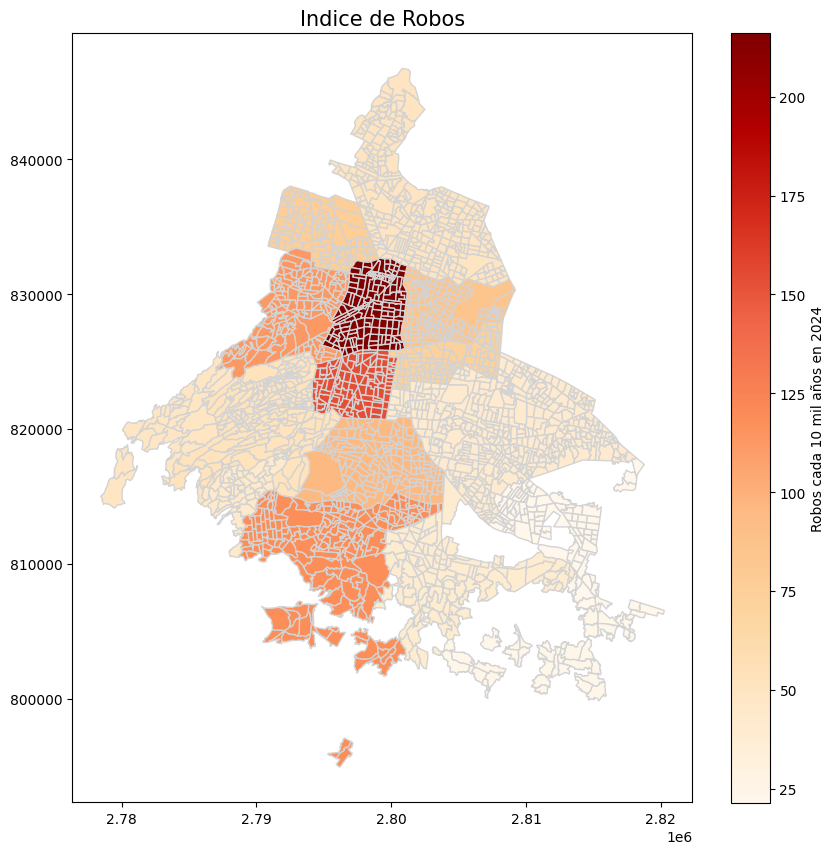

In [ ]:
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

robos_cdmx.plot(column='Robos por cada 10 mil habitantes', ax=ax, legend=True, edgecolor="lightgray",
                 legend_kwds={"label": "Robos cada 10 mil años en 2024"},
                 cmap="OrRd",
                 missing_kwds={"color": "green", "label": "Sin datos"})

plt.title("Indice de Robos", fontsize=15)

# Mostrar el mapa
plt.show()

##Analisis Moran

In [ ]:

# **1. Crear matriz de pesos espaciales basada en vecinos**
w = lps.weights.Queen.from_dataframe(robos_cdmx)
w.transform = "r"  # Normalización de los pesos

# **2. Calcular el Índice de Moran**
y = robos_cdmx["Total Año"].values  # Variable de análisis
moran = esda.Moran(y, w)

# **3. Imprimir resultados**
print(f"Índice de Moran: {moran.I}")
print(f"p-valor: {moran.p_sim}")  # Si p < 0.05, hay autocorrelación significativa

<ipython-input-16-67b798f554f2>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(robos_cdmx)


('WARNING: ', 1833, ' is an island (no neighbors)')
Índice de Moran: 0.9126596409016772
p-valor: 0.001


/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There is 1 island with id: 1833.
  W.__init__(self, neighbors, ids=ids, **kw)


/usr/local/lib/python3.11/dist-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


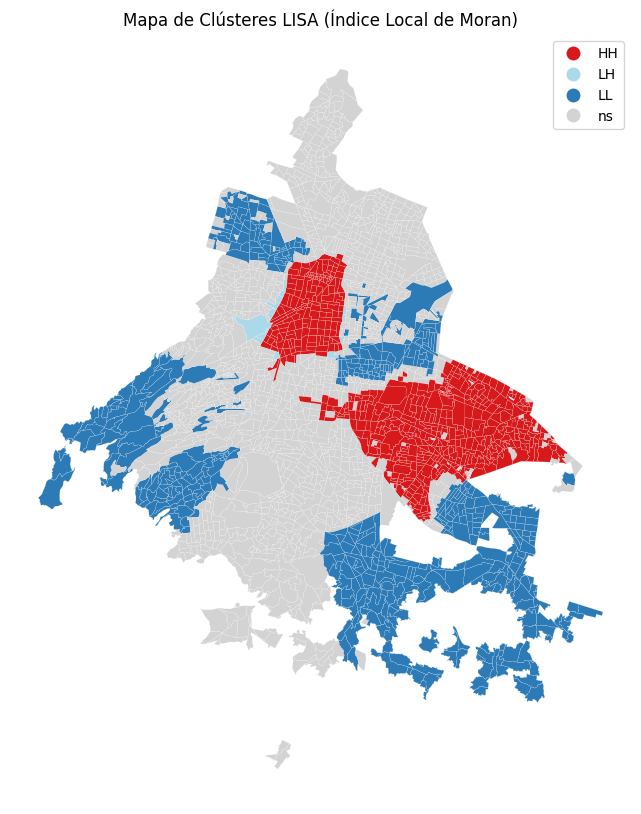

In [ ]:
import esda
from splot.esda import lisa_cluster

# Calcular el Índice Local de Moran (LISA)
lisa = esda.Moran_Local(y, w)

# Crear el mapa de clusters LISA
fig, ax = plt.subplots(1, figsize=(10, 10))
lisa_cluster(lisa, robos_cdmx, p=0.05, ax=ax)
ax.set_title("Mapa de Clústeres LISA (Índice Local de Moran)")
plt.show()

In [ ]:
from esda.moran import Moran_BV

# Seleccionar variables para comparar
y1 = robos_cdmx["Enero"].values
y2 = robos_cdmx["Julio"].values

# Calcular Índice de Moran Bivariado
moran_bv = Moran_BV(y1, y2, w)

print(f"Índice de Moran Bivariado: {moran_bv.I}")
print(f"p-valor: {moran_bv.p_sim}")

Índice de Moran Bivariado: 0.8892775858258987
p-valor: 0.001
